Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Number of Referrals--->12
Tenure in Months--->72
Offer--->6
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->2
Internet Service--->2
Internet Type--->3
Avg Monthly GB Download--->49
Online Security--->2
Online Backup--->2
Device Protection Plan--->2
Premium Tech Support--->2
Streaming TV--->2
Streaming Movies--->2
Streaming Music--->2
Unlimited Data--->2
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3


ValueError: ignored

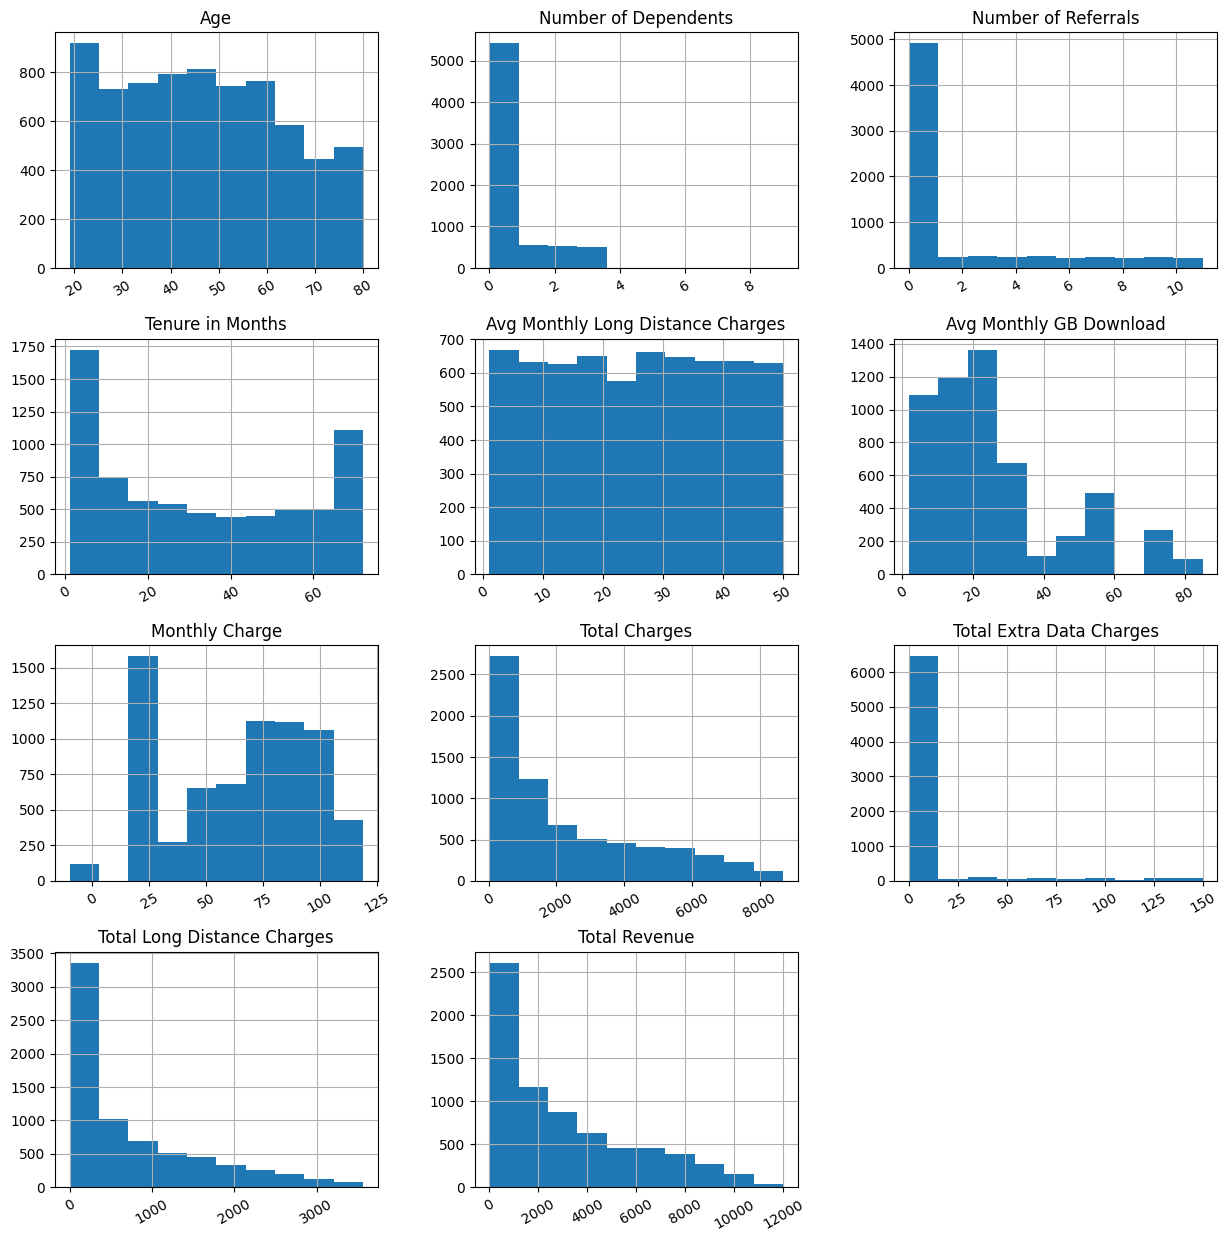

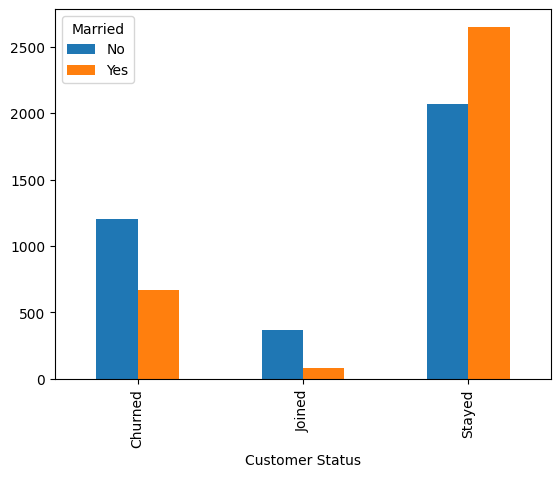

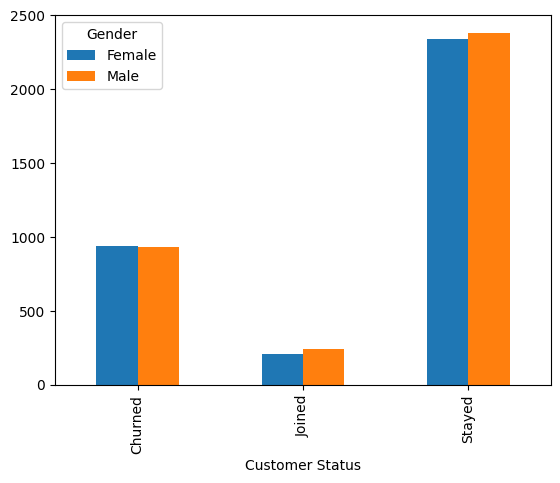

In [11]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/telecom_customer_churn.csv')
df.head(5)
df.columns
df1 = df.copy()
df1.head(7)
df1.columns
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)
df1.shape
df1.dtypes
features = df1.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')
     df1.isnull().sum() / df1.shape[0]
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
    df1=df1.interpolate()
    df1=df1.dropna()
df.head()
df['Unlimited Data']
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')
            unique_values_names(df1)
            import plotly.express as px
            fig = px.histogram(df1, x = 'Age')
            fig.show()
df1.hist(figsize=(15,15), xrot=30)
df1['Age']
import matplotlib.pyplot as plt
Customer_Stayed=df1[df1['Customer Status']=='Stayed'].Age
Customer_Churned=df1[df1['Customer Status']=='Churned'].Age
Customer_Joined=df1[df1['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

df1.columns
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')
df1['Payment Method'].unique()
Roles = {}
for j in df1['Payment Method'].unique():
    Roles[j] = df1[df1['Payment Method'] == j]
    Roles.keys()
    Roles['Credit Card']
    len(Roles)
off = df1['Offer'].value_counts()
off
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=off.index, y=off.values)])
fig.show()
df1_off = Roles['Credit Card'].Offer.value_counts()
df1_off
fig = go.Figure([go.Bar(x= df1_off.index, y=df1_off.values)])
fig.show()
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})
Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()
df1_state = Roles1['Stayed'].Offer.value_counts()
df1_state
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
yes_and_no=[  'Paperless Billing', 'Unlimited Data',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)
    df1.replace({"Phone Service":{'Yes':1}},inplace=True)
    from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']
X.head(5)
y.head(5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)
len(X_train)
X_train[:10]

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]

        }
    },
}


from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
  clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
reg=XGBClassifier()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
y_predicted = reg.predict(X_test)
y_predicted[:5]
y_test[:5]
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

